<a href="https://colab.research.google.com/github/ClaudioAresu/BitPrice_Project/blob/main/10Time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Get Data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin.

In [ ]:
!wget https://raw.githubusercontent.com/ClaudioAresu/BitPrice_Project/main/BTC_USD_Preprocessed.csv

--2023-04-04 11:13:36--  https://raw.githubusercontent.com/ClaudioAresu/BitPrice_Project/main/BTC_USD_Preprocessed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265320 (259K) [text/plain]
Saving to: ‘BTC_USD_Preprocessed.csv.1’

BTC_USD_Preprocesse 100%[===================>] 259.10K  --.-KB/s    in 0.01s   

2023-04-04 11:13:36 (22.7 MB/s) - ‘BTC_USD_Preprocessed.csv.1’ saved [265320/265320]



## Importing time series with pandas

In [ ]:
import pandas as pd

# Read in the Bitcoin data and parse with the dates
df = pd.read_csv("BTC_USD_Preprocessed.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # Parse the date column and tell pandas column one is datetime
df.head()

,24h Open (USD),24h High (USD),24h Low (USD),Closing Price (USD),Adjusted Close (USD),Volume,Currency
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,BTC
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,BTC
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,BTC
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,BTC
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,BTC


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3108 entries, 2014-09-17 to 2023-03-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   24h Open (USD)        3108 non-null   float64
 1   24h High (USD)        3108 non-null   float64
 2   24h Low (USD)         3108 non-null   float64
 3   Closing Price (USD)   3108 non-null   float64
 4   Adjusted Close (USD)  3108 non-null   float64
 5   Volume                3108 non-null   int64  
 6   Currency              3108 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 194.2+ KB


In [ ]:
# How many samples do we have?

df.tail()

,24h Open (USD),24h High (USD),24h Low (USD),Closing Price (USD),Adjusted Close (USD),Volume,Currency
Date,,,,,,,
2023-03-17,25055.123047,27787.812500,24955.169922,27423.929688,27423.929688,50730261335,BTC
2023-03-18,27448.117188,27725.953125,26636.261719,26965.878906,26965.878906,35723036817,BTC
2023-03-19,26969.503906,28440.560547,26907.716797,28038.675781,28038.675781,37769448859,BTC
2023-03-20,28041.601563,28527.724609,27242.880859,27767.236328,27767.236328,44774027664,BTC
2023-03-21,27784.175781,28237.902344,27439.646484,27961.429688,27961.429688,36341706752,BTC


In [ ]:
len(df)

3108

## Types of time series:
* Trend: time series has a clear long-term incrase or decrease
* Seasonal: time series affected by seasonal factors such as time of the year or day of the week
* Cyclic: time series shows rises and falls over an unfixed period, thse tend to be longer/more variable than seasonal patterns

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [ ]:
bitcoin_prices[-5:]

,Price
Date,
2023-03-17,27423.929688
2023-03-18,26965.878906
2023-03-19,28038.675781
2023-03-20,27767.236328
2023-03-21,27961.429688


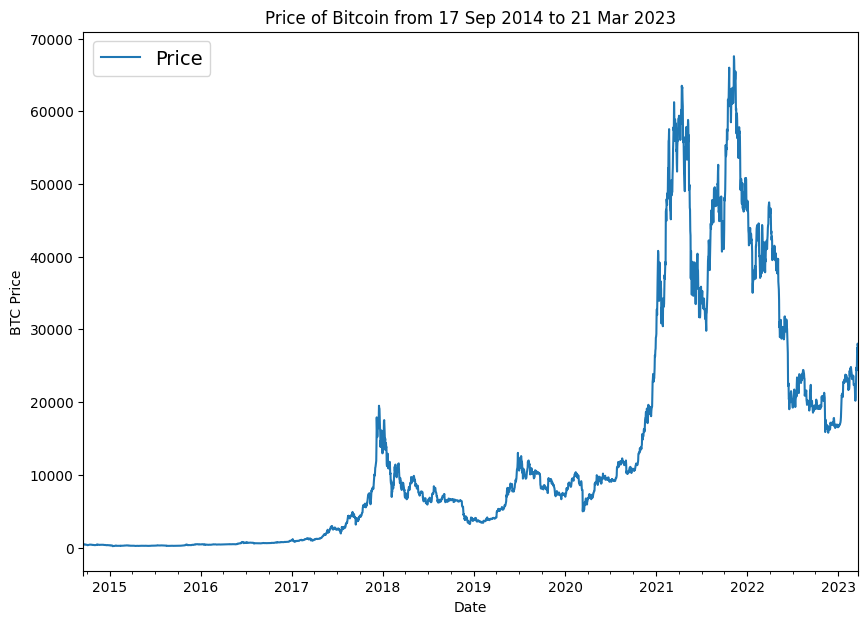

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 17 Sep 2014 to 21 Mar 2023")
plt.legend(fontsize=14)

## Importing time series data with Python's CSV Module

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open ("/content/BTC_USD_Preprocessed.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) # first line is a header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as datetime (not needed in this case)
    btc_price.append(float(line[4])) # get the closing price as float (also not needed since I've already worked with the dataframe)

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

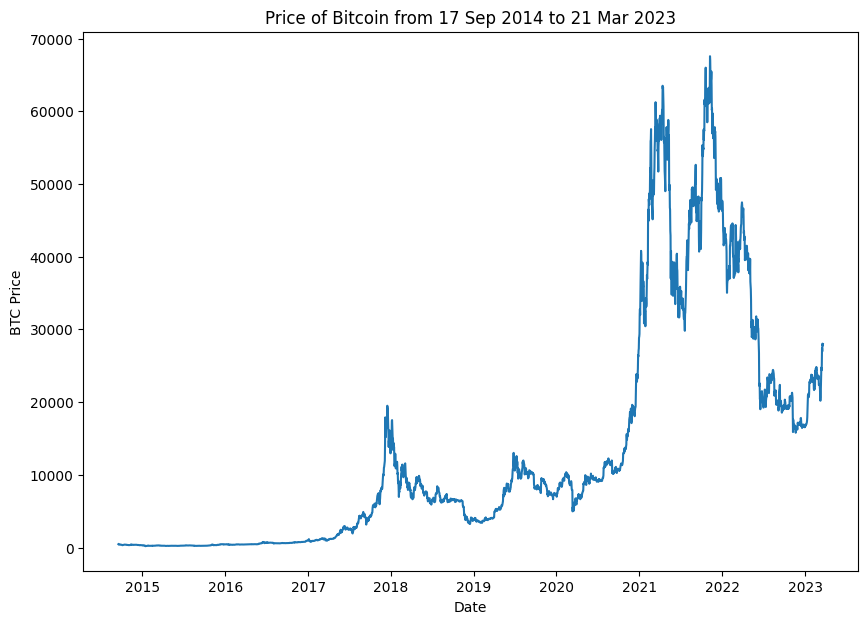

In [ ]:
# Plot from CSV

plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 17 Sep 2014 to 21 Mar 2023")
plt.xlabel("Date");

## Format data part 1: Create train and test splits (How **NOT** to do it)

In [ ]:
import numpy as np
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2486,), (622,), (2486,), (622,))

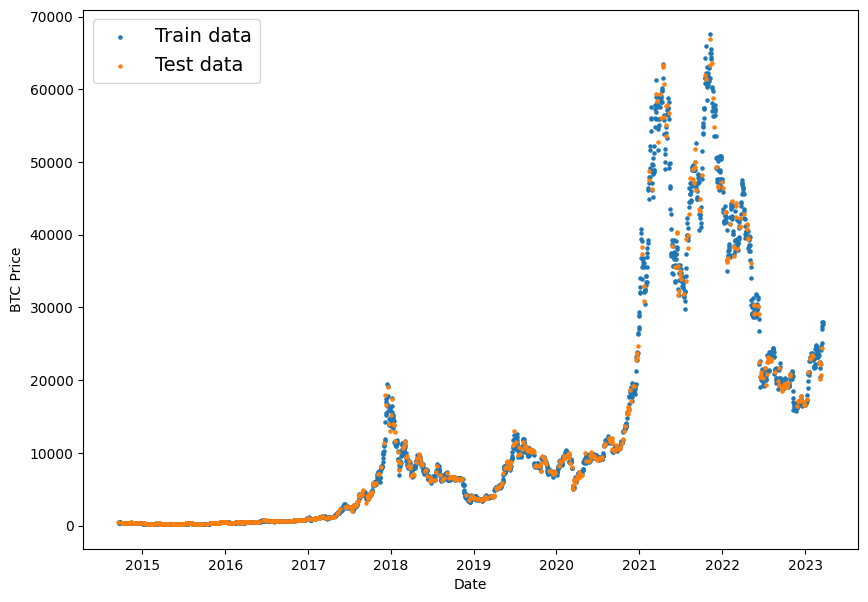

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Data from the pseudo future laks into the past, because the split is from random points in time that are intertwined with the train data.

### Create train & test sets for time series (the **RIGHT** way)

In [ ]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2486, 622, 2486, 622)

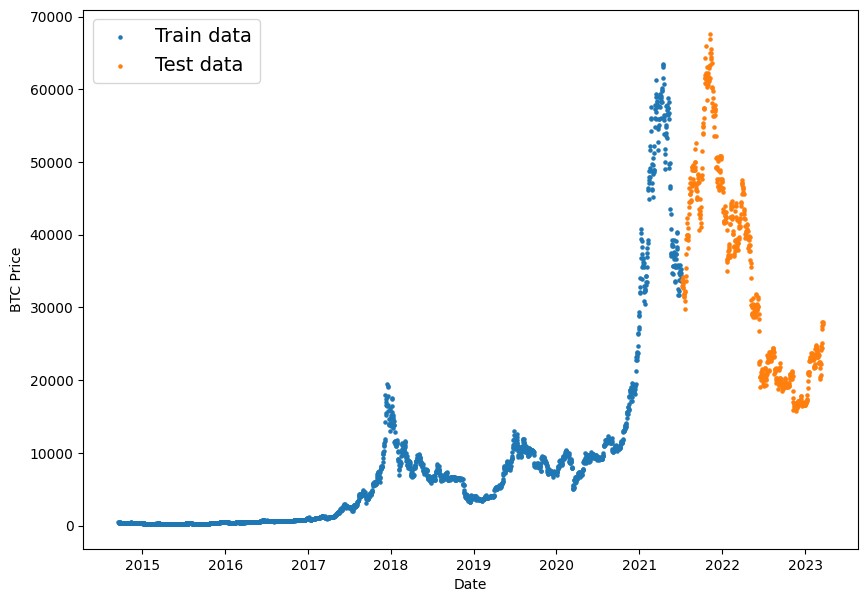

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
## Create a plotting function
"""
Plots timesteps (a series of points in time) against values (a series of values across time)

Parameters
----------
timesteps: array of timestep values
values: array of values across time
format: style of plot, default "."
start: where to start the plot (setting a value will index from start of timesteps & values)
end : where to end the plot (similar to start but for the end)
label: albel to show on plot about values, default=None
"""
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


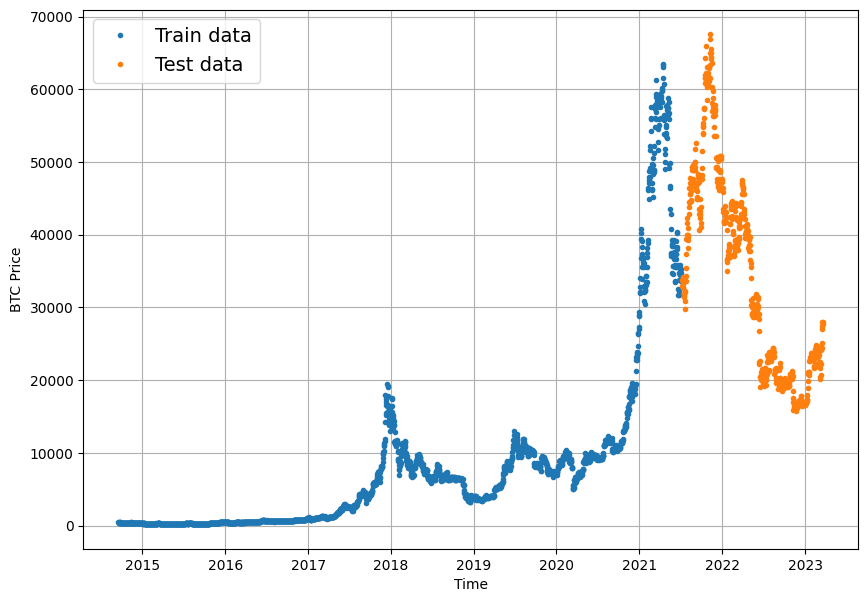

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, now it's time to try and run some experiments:

0. Baseline(Naive model)
1. Dense, horizon = 1, window = 7
2. Dense, horizon = 1, window = 30
3. Dense, horizon = 7, window = 30
4. Conv1D
5. LSTM
6. Same as Model 1 (but with multivariate data)
7. N-BEATS algorithm
8. Ensemble (multiple models stacked together)
9. Future prediction model
10. Same as model 1 (but with turkey data introduced)

* horizon: number of timesteps into the future we're going to predict
* window: number of timesteps we're going to use to predict the horizion

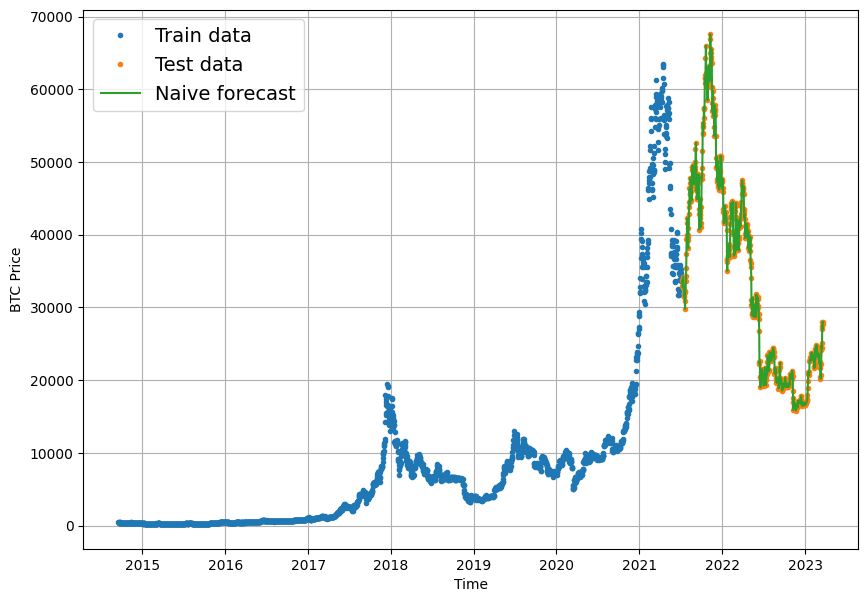

In [ ]:
naive_forecast = y_test[:-1]

plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a **number**, so that means we have a form of regression problem.

Because we're working on a refression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* Huber
* RMSE - root mean squared error
* MAPE - mean absolute percentage error 
* sMAPE - symmetric mean absolute percentage error (not recommended: Hyndman & Koehler)
* MASE - mean absolute scaled error

In [ ]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
  """
  implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season


In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:],
                           y_pred=naive_forecast).numpy()

1.0002265739404066

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return{"mae": mae.numpy(),
         "mse": mse.numpy(),
         "rmse": rmse.numpy(),
         "mape": mape.numpy(),
         "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 807.2651,
 'mse': 1472733.9,
 'rmse': 1213.5625,
 'mape': 2.3311524,
 'mase': 1.0002266}

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=33501.24941603377>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=15787.28418>,
 <tf.Tensor: shape=(), dtype=float64, numpy=67566.828125>)

## Format data Part 2: Windowing our dataset

In [ ]:
print(f"We want to use this: {btc_price[:7]}, to predict: {btc_price[7]}")

We want to use this: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985], to predict: 423.204987


In [ ]:
# Setup global variables
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed datasets.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


## NumPy Array Indexing

Our function will:
1. Create a window steps of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:


```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to
index on a target series (e.g. the historical price of Bitcoin
4. Uses our `get_labelled_window()` function we created above to turn the window steps into windows with a specified horizon

> **Resource**: the function we're about to create has been adpted from the following article:
https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [ ]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # Create 2D array of window of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled window
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(3101, 3101)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows [i]}) -> Label:{full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985]) -> Label:[423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987]) -> Label:[411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005]) -> Label:[404.424988]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]}) -> Label{full_labels[i-3]}")

Window: [22163.949219 24197.533203 24746.074219 24375.960938 25052.789063
 27423.929688 26965.878906]) -> Label[28038.675781]
Window: [24197.533203 24746.074219 24375.960938 25052.789063 27423.929688
 26965.878906 28038.675781]) -> Label[27767.236328]
Window: [24746.074219 24375.960938 25052.789063 27423.929688 26965.878906
 28038.675781 27767.236328]) -> Label[27961.429688]


Note: You can find a function which works similarly to that one which we created:
* 

`tf.keras.preprocessing.timeseries_dataset_from_array`



## Turning windows into training and test sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  splits_size = int(len(windows) * (1-test_split)) # this will default to 80/20% train/test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2486, 615, 2486, 615)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[32877.371094, 33798.011719, 33520.519531, 34240.1875  ,
         33155.847656, 32702.025391, 32822.347656],
        [33798.011719, 33520.519531, 34240.1875  , 33155.847656,
         32702.025391, 32822.347656, 31780.730469],
        [33520.519531, 34240.1875  , 33155.847656, 32702.025391,
         32822.347656, 31780.730469, 31421.539063],
        [34240.1875  , 33155.847656, 32702.025391, 32822.347656,
         31780.730469, 31421.539063, 31533.068359],
        [33155.847656, 32702.025391, 32822.347656, 31780.730469,
         31421.539063, 31533.068359, 31796.810547]]),
 array([[31780.730469],
        [31421.539063],
        [31533.068359],
        [31796.810547],
        [30817.832031]]))

In [ ]:
y_train[:7]

array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])

In [ ]:
train_labels[:-HORIZON-1]

array([[  423.204987],
       [  411.574005],
       [  404.424988],
       ...,
       [33520.519531],
       [34240.1875  ],
       [33155.847656]])

## Make a modelling checkpoint

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on a certain epoch, we want to load and evaluate the model saved on the best performing epoch.

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback witha  specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)


### Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* *Hyperparameters* =  values a machine learning practitioner
can adjust
* *Parameters* = values a model elarns on its own
* 


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
13/20 [==================>...........] - ETA: 0s - loss: 5770.8730 - mae: 5770.8730 - mse: 120413880.0000

20/20 [==============================] - 5s 110ms/step - loss: 4145.2954 - mae: 4145.2954 - mse: 81847464.0000 - val_loss: 5880.4639 - val_mae: 5880.4639 - val_mse: 45173984.0000
Epoch 2/100
18/20 [==========================>...] - ETA: 0s - loss: 898.3613 - mae: 898.3613 - mse: 3688460.5000  

20/20 [==============================] - 2s 80ms/step - loss: 881.1589 - mae: 881.1589 - mse: 3552723.5000 - val_loss: 1641.1685 - val_mae: 1641.1685 - val_mse: 5155482.0000
Epoch 3/100
19/20 [===========================>..] - ETA: 0s - loss: 499.9368 - mae: 499.9368 - mse: 1483107.0000

20/20 [==============================] - 1s 74ms/step - loss: 499.0858 - mae: 499.0858 - mse: 1480676.3750 - val_loss: 1481.3981 - val_mae: 1481.3981 - val_mse: 4336452.5000
Epoch 4/100
19/20 [===========================>..] - ETA: 0s - loss: 457.1416 - mae: 457.1416 - mse: 1255215.7500

20/20 [==============================] - 1s 66ms/step - loss: 453.3955 - mae: 453.3955 - mse: 1235280.2500 - val_loss: 1430.2911 - val_mae: 1430.2911 - val_mse: 4096503.7500
Epoch 5/100
 8/20 [===========>..................] - ETA: 0s - loss: 406.2885 - mae: 406.2885 - mse: 1007624.0625

20/20 [==============================] - 1s 47ms/step - loss: 438.1754 - mae: 438.1754 - mse: 1135080.7500 - val_loss: 1401.4894 - val_mae: 1401.4894 - val_mse: 3921798.5000
Epoch 6/100
15/20 [=====================>........] - ETA: 0s - loss: 414.6923 - mae: 414.6923 - mse: 1024450.0000

20/20 [==============================] - 1s 56ms/step - loss: 424.2327 - mae: 424.2327 - mse: 1082819.5000 - val_loss: 1341.0414 - val_mae: 1341.0414 - val_mse: 3609633.7500
Epoch 7/100
19/20 [===========================>..] - ETA: 0s - loss: 406.1882 - mae: 406.1882 - mse: 980979.3750

20/20 [==============================] - 1s 62ms/step - loss: 406.4120 - mae: 406.4120 - mse: 994153.3750 - val_loss: 1301.1418 - val_mae: 1301.1418 - val_mse: 3402632.0000
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 396.2588 - mae: 396.2588 - mse: 948768.7500 - val_loss: 1303.8489 - val_mae: 1303.8489 - val_mse: 3369301.7500
Epoch 9/100
20/20 [==============================] - 0s 12ms/step - loss: 393.6358 - mae: 393.6358 - mse: 936617.8125 - val_loss: 1358.0995 - val_mae: 1358.0995 - val_mse: 3562226.2500
Epoch 10/100
15/20 [=====================>........] - ETA: 0s - loss: 390.7918 - mae: 390.7918 - mse: 932409.0625

20/20 [==============================] - 1s 53ms/step - loss: 382.4677 - mae: 382.4677 - mse: 883178.5625 - val_loss: 1275.3206 - val_mae: 1275.3206 - val_mse: 3206247.5000
Epoch 11/100
11/20 [===============>..............] - ETA: 0s - loss: 389.8597 - mae: 389.8597 - mse: 911483.4375 

20/20 [==============================] - 1s 59ms/step - loss: 385.6356 - mae: 385.6356 - mse: 868423.6875 - val_loss: 1186.1205 - val_mae: 1186.1205 - val_mse: 2846081.0000
Epoch 12/100
20/20 [==============================] - ETA: 0s - loss: 362.0657 - mae: 362.0657 - mse: 760634.2500

20/20 [==============================] - 1s 46ms/step - loss: 362.0657 - mae: 362.0657 - mse: 760634.2500 - val_loss: 1153.4089 - val_mae: 1153.4089 - val_mse: 2703537.7500
Epoch 13/100
20/20 [==============================] - 0s 7ms/step - loss: 387.4204 - mae: 387.4204 - mse: 867801.5000 - val_loss: 1480.5217 - val_mae: 1480.5217 - val_mse: 3886213.2500
Epoch 14/100
14/20 [====================>.........] - ETA: 0s - loss: 344.0303 - mae: 344.0303 - mse: 703824.3125

20/20 [==============================] - 1s 55ms/step - loss: 352.9617 - mae: 352.9617 - mse: 750974.3750 - val_loss: 1090.3857 - val_mae: 1090.3857 - val_mse: 2444236.2500
Epoch 15/100
20/20 [==============================] - ETA: 0s - loss: 331.3868 - mae: 331.3868 - mse: 656584.5000

20/20 [==============================] - 1s 78ms/step - loss: 331.3868 - mae: 331.3868 - mse: 656584.5000 - val_loss: 1088.4712 - val_mae: 1088.4712 - val_mse: 2432518.5000
Epoch 16/100
20/20 [==============================] - 0s 9ms/step - loss: 327.4687 - mae: 327.4687 - mse: 638759.5625 - val_loss: 1088.5648 - val_mae: 1088.5648 - val_mse: 2425938.7500
Epoch 17/100
20/20 [==============================] - 0s 11ms/step - loss: 325.7505 - mae: 325.7505 - mse: 646239.9375 - val_loss: 1140.2509 - val_mae: 1140.2509 - val_mse: 2520774.2500
Epoch 18/100
15/20 [=====================>........] - ETA: 0s - loss: 314.8436 - mae: 314.8436 - mse: 589756.1875

20/20 [==============================] - 1s 61ms/step - loss: 315.4338 - mae: 315.4338 - mse: 591744.3125 - val_loss: 1000.2535 - val_mae: 1000.2535 - val_mse: 2098061.5000
Epoch 19/100
20/20 [==============================] - 0s 9ms/step - loss: 307.3152 - mae: 307.3152 - mse: 571162.1250 - val_loss: 1050.3596 - val_mae: 1050.3596 - val_mse: 2285865.0000
Epoch 20/100
20/20 [==============================] - 0s 10ms/step - loss: 332.5039 - mae: 332.5039 - mse: 653772.8750 - val_loss: 1285.7885 - val_mae: 1285.7885 - val_mse: 3138913.5000
Epoch 21/100
20/20 [==============================] - 0s 12ms/step - loss: 310.4168 - mae: 310.4168 - mse: 566125.1875 - val_loss: 1140.6993 - val_mae: 1140.6993 - val_mse: 2608364.7500
Epoch 22/100
20/20 [==============================] - 0s 10ms/step - loss: 306.2205 - mae: 306.2205 - mse: 539043.1250 - val_loss: 1143.8022 - val_mae: 1143.8022 - val_mse: 2613624.0000
Epoch 23/100
20/20 [==============================] - 0s 9ms/step - loss: 316.1725 -

20/20 [==============================] - 1s 50ms/step - loss: 320.4629 - mae: 320.4629 - mse: 591835.8750 - val_loss: 975.3531 - val_mae: 975.3531 - val_mse: 2011773.7500
Epoch 25/100
18/20 [==========================>...] - ETA: 0s - loss: 283.9376 - mae: 283.9376 - mse: 509455.8750

20/20 [==============================] - 1s 40ms/step - loss: 293.3047 - mae: 293.3047 - mse: 535383.1250 - val_loss: 963.0884 - val_mae: 963.0884 - val_mse: 1966481.5000
Epoch 26/100
20/20 [==============================] - 0s 9ms/step - loss: 292.6713 - mae: 292.6713 - mse: 514005.8438 - val_loss: 1014.5568 - val_mae: 1014.5568 - val_mse: 2146148.5000
Epoch 27/100
20/20 [==============================] - 0s 8ms/step - loss: 283.6667 - mae: 283.6667 - mse: 503523.0625 - val_loss: 1026.9681 - val_mae: 1026.9681 - val_mse: 2080175.5000
Epoch 28/100
19/20 [===========================>..] - ETA: 0s - loss: 284.3528 - mae: 284.3528 - mse: 489328.2188

20/20 [==============================] - 1s 56ms/step - loss: 284.6184 - mae: 284.6184 - mse: 500086.1250 - val_loss: 922.6533 - val_mae: 922.6533 - val_mse: 1811105.1250
Epoch 29/100
20/20 [==============================] - 0s 11ms/step - loss: 282.4997 - mae: 282.4997 - mse: 503155.6562 - val_loss: 1021.0222 - val_mae: 1021.0222 - val_mse: 2059385.1250
Epoch 30/100
20/20 [==============================] - 0s 8ms/step - loss: 303.6321 - mae: 303.6321 - mse: 555904.3750 - val_loss: 1446.4674 - val_mae: 1446.4674 - val_mse: 3676024.7500
Epoch 31/100
11/20 [===============>..............] - ETA: 0s - loss: 326.7887 - mae: 326.7887 - mse: 617656.1875

20/20 [==============================] - 1s 44ms/step - loss: 304.1746 - mae: 304.1746 - mse: 565682.2500 - val_loss: 915.2224 - val_mae: 915.2224 - val_mse: 1776281.1250
Epoch 32/100
20/20 [==============================] - 0s 8ms/step - loss: 271.2448 - mae: 271.2448 - mse: 469999.3750 - val_loss: 955.4696 - val_mae: 955.4696 - val_mse: 1872993.2500
Epoch 33/100
11/20 [===============>..............] - ETA: 0s - loss: 285.3410 - mae: 285.3410 - mse: 504573.1875

20/20 [==============================] - 1s 48ms/step - loss: 282.3542 - mae: 282.3542 - mse: 491286.2812 - val_loss: 910.6800 - val_mae: 910.6800 - val_mse: 1760008.5000
Epoch 34/100
20/20 [==============================] - 0s 10ms/step - loss: 276.3980 - mae: 276.3980 - mse: 492653.9688 - val_loss: 940.3206 - val_mae: 940.3206 - val_mse: 1871844.7500
Epoch 35/100
20/20 [==============================] - 0s 6ms/step - loss: 275.4801 - mae: 275.4801 - mse: 482266.7812 - val_loss: 1101.3833 - val_mae: 1101.3833 - val_mse: 2290640.0000
Epoch 36/100
19/20 [===========================>..] - ETA: 0s - loss: 285.3892 - mae: 285.3892 - mse: 482447.0000

20/20 [==============================] - 1s 66ms/step - loss: 285.6155 - mae: 285.6155 - mse: 487494.3750 - val_loss: 907.3981 - val_mae: 907.3981 - val_mse: 1760712.3750
Epoch 37/100
20/20 [==============================] - 0s 20ms/step - loss: 276.6513 - mae: 276.6513 - mse: 480802.8438 - val_loss: 952.1899 - val_mae: 952.1899 - val_mse: 1859941.0000
Epoch 38/100
20/20 [==============================] - 0s 16ms/step - loss: 270.2536 - mae: 270.2536 - mse: 469034.9375 - val_loss: 933.6276 - val_mae: 933.6276 - val_mse: 1809438.1250
Epoch 39/100
20/20 [==============================] - 0s 11ms/step - loss: 283.0806 - mae: 283.0806 - mse: 505934.0000 - val_loss: 1055.7886 - val_mae: 1055.7886 - val_mse: 2235531.7500
Epoch 40/100
20/20 [==============================] - 0s 17ms/step - loss: 272.1037 - mae: 272.1037 - mse: 477787.9062 - val_loss: 918.7578 - val_mae: 918.7578 - val_mse: 1768838.5000
Epoch 41/100
20/20 [==============================] - 0s 8ms/step - loss: 269.5782 - mae: 2

20/20 [==============================] - 1s 36ms/step - loss: 266.5748 - mae: 266.5748 - mse: 467603.9375 - val_loss: 886.2886 - val_mae: 886.2886 - val_mse: 1684184.8750
Epoch 47/100
20/20 [==============================] - 0s 8ms/step - loss: 291.0264 - mae: 291.0264 - mse: 515479.8750 - val_loss: 1005.7248 - val_mae: 1005.7248 - val_mse: 2003156.2500
Epoch 48/100
20/20 [==============================] - 0s 6ms/step - loss: 281.9556 - mae: 281.9556 - mse: 490921.2812 - val_loss: 893.3165 - val_mae: 893.3165 - val_mse: 1723999.5000
Epoch 49/100
20/20 [==============================] - 0s 6ms/step - loss: 270.3420 - mae: 270.3420 - mse: 466367.1875 - val_loss: 907.4285 - val_mae: 907.4285 - val_mse: 1767274.1250
Epoch 50/100
20/20 [==============================] - 0s 9ms/step - loss: 276.6054 - mae: 276.6054 - mse: 498401.7188 - val_loss: 925.0535 - val_mae: 925.0535 - val_mse: 1782794.3750
Epoch 51/100
20/20 [==============================] - 0s 16ms/step - loss: 269.0816 - mae: 269.

20/20 [==============================] - 1s 46ms/step - loss: 277.0717 - mae: 277.0717 - mse: 452110.4062 - val_loss: 877.5712 - val_mae: 877.5712 - val_mse: 1672723.6250
Epoch 53/100
20/20 [==============================] - 0s 6ms/step - loss: 265.3072 - mae: 265.3072 - mse: 446777.6562 - val_loss: 1075.6085 - val_mae: 1075.6085 - val_mse: 2265708.2500
Epoch 54/100
20/20 [==============================] - 0s 9ms/step - loss: 267.8654 - mae: 267.8654 - mse: 463204.2500 - val_loss: 985.6250 - val_mae: 985.6250 - val_mse: 1989608.8750
Epoch 55/100
20/20 [==============================] - 0s 12ms/step - loss: 262.3775 - mae: 262.3775 - mse: 451442.1875 - val_loss: 878.1943 - val_mae: 878.1943 - val_mse: 1679027.2500
Epoch 56/100
20/20 [==============================] - 0s 5ms/step - loss: 262.8141 - mae: 262.8141 - mse: 444504.0000 - val_loss: 930.1256 - val_mae: 930.1256 - val_mse: 1827716.0000
Epoch 57/100
18/20 [==========================>...] - ETA: 0s - loss: 289.6900 - mae: 289.6900

20/20 [==============================] - 1s 37ms/step - loss: 285.4832 - mae: 285.4832 - mse: 508999.7812 - val_loss: 870.4662 - val_mae: 870.4662 - val_mse: 1646571.2500
Epoch 58/100
20/20 [==============================] - 0s 6ms/step - loss: 273.9303 - mae: 273.9303 - mse: 469180.0312 - val_loss: 1114.6306 - val_mae: 1114.6306 - val_mse: 2380659.2500
Epoch 59/100
18/20 [==========================>...] - ETA: 0s - loss: 268.2312 - mae: 268.2312 - mse: 445902.4375 

20/20 [==============================] - 1s 44ms/step - loss: 267.8611 - mae: 267.8611 - mse: 444321.9688 - val_loss: 869.3923 - val_mae: 869.3923 - val_mse: 1646542.7500
Epoch 60/100
20/20 [==============================] - 0s 5ms/step - loss: 260.0096 - mae: 260.0096 - mse: 437349.3438 - val_loss: 882.1878 - val_mae: 882.1878 - val_mse: 1668590.2500
Epoch 61/100
20/20 [==============================] - 0s 6ms/step - loss: 260.5139 - mae: 260.5139 - mse: 442546.9375 - val_loss: 889.6725 - val_mae: 889.6725 - val_mse: 1688184.8750
Epoch 62/100
20/20 [==============================] - 0s 9ms/step - loss: 260.6917 - mae: 260.6917 - mse: 447031.7500 - val_loss: 894.8510 - val_mae: 894.8510 - val_mse: 1701349.0000
Epoch 63/100
20/20 [==============================] - 0s 8ms/step - loss: 276.1141 - mae: 276.1141 - mse: 462259.7500 - val_loss: 1040.5010 - val_mae: 1040.5010 - val_mse: 2141637.2500
Epoch 64/100
20/20 [==============================] - 0s 7ms/step - loss: 270.9082 - mae: 270.9

20/20 [==============================] - 1s 46ms/step - loss: 272.3233 - mae: 272.3233 - mse: 476652.5312 - val_loss: 867.4689 - val_mae: 867.4689 - val_mse: 1633515.8750
Epoch 71/100
20/20 [==============================] - 0s 7ms/step - loss: 258.8390 - mae: 258.8390 - mse: 435409.4688 - val_loss: 873.7761 - val_mae: 873.7761 - val_mse: 1649086.5000
Epoch 72/100
20/20 [==============================] - 0s 5ms/step - loss: 264.8293 - mae: 264.8293 - mse: 450690.5625 - val_loss: 943.2747 - val_mae: 943.2747 - val_mse: 1823383.1250
Epoch 73/100
20/20 [==============================] - ETA: 0s - loss: 264.2707 - mae: 264.2707 - mse: 437010.0625

20/20 [==============================] - 1s 43ms/step - loss: 264.2707 - mae: 264.2707 - mse: 437010.0625 - val_loss: 861.6968 - val_mae: 861.6968 - val_mse: 1619520.0000
Epoch 74/100
20/20 [==============================] - 0s 6ms/step - loss: 262.6297 - mae: 262.6297 - mse: 451207.1562 - val_loss: 957.1346 - val_mae: 957.1346 - val_mse: 1893089.0000
Epoch 75/100
16/20 [=======================>......] - ETA: 0s - loss: 265.7745 - mae: 265.7745 - mse: 433569.7188

20/20 [==============================] - 1s 39ms/step - loss: 266.3571 - mae: 266.3571 - mse: 450561.8125 - val_loss: 861.0599 - val_mae: 861.0599 - val_mse: 1630979.5000
Epoch 76/100
20/20 [==============================] - 0s 6ms/step - loss: 261.4774 - mae: 261.4774 - mse: 441161.2188 - val_loss: 862.1685 - val_mae: 862.1685 - val_mse: 1619508.6250
Epoch 77/100
20/20 [==============================] - 0s 5ms/step - loss: 255.1288 - mae: 255.1288 - mse: 426509.6562 - val_loss: 888.4398 - val_mae: 888.4398 - val_mse: 1705868.6250
Epoch 78/100
20/20 [==============================] - 0s 8ms/step - loss: 264.1495 - mae: 264.1495 - mse: 452322.8438 - val_loss: 1011.0344 - val_mae: 1011.0344 - val_mse: 2002897.7500
Epoch 79/100
20/20 [==============================] - 0s 5ms/step - loss: 273.4536 - mae: 273.4536 - mse: 480826.0312 - val_loss: 861.4008 - val_mae: 861.4008 - val_mse: 1617157.8750
Epoch 80/100
14/20 [====================>.........] - ETA: 0s - loss: 258.2982 - mae: 258.2982 

20/20 [==============================] - 2s 106ms/step - loss: 262.1726 - mae: 262.1726 - mse: 446713.9375 - val_loss: 852.3169 - val_mae: 852.3169 - val_mse: 1596408.2500
Epoch 81/100
14/20 [====================>.........] - ETA: 0s - loss: 266.6834 - mae: 266.6834 - mse: 477447.1562

20/20 [==============================] - 1s 51ms/step - loss: 269.5265 - mae: 269.5265 - mse: 464584.6875 - val_loss: 849.2513 - val_mae: 849.2513 - val_mse: 1592282.8750
Epoch 82/100
20/20 [==============================] - 0s 10ms/step - loss: 253.1116 - mae: 253.1116 - mse: 424555.4062 - val_loss: 868.2916 - val_mae: 868.2916 - val_mse: 1633197.0000
Epoch 83/100
20/20 [==============================] - 0s 8ms/step - loss: 263.8617 - mae: 263.8617 - mse: 446889.8750 - val_loss: 1011.1621 - val_mae: 1011.1621 - val_mse: 2039841.7500
Epoch 84/100
20/20 [==============================] - 0s 10ms/step - loss: 263.2798 - mae: 263.2798 - mse: 441711.1250 - val_loss: 877.8421 - val_mae: 877.8421 - val_mse: 1655065.1250
Epoch 85/100
20/20 [==============================] - 0s 8ms/step - loss: 259.8475 - mae: 259.8475 - mse: 435907.2500 - val_loss: 857.6690 - val_mae: 857.6690 - val_mse: 1608122.7500
Epoch 86/100
20/20 [==============================] - 0s 8ms/step - loss: 253.0090 - mae: 253

20/20 [==============================] - 1s 32ms/step - loss: 270.8099 - mae: 270.8099 - mse: 468315.3438 - val_loss: 846.5530 - val_mae: 846.5530 - val_mse: 1589843.6250
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 282.9075 - mae: 282.9075 - mse: 474557.8750 - val_loss: 1154.8638 - val_mae: 1154.8638 - val_mse: 2487695.2500
Epoch 94/100
17/20 [========================>.....] - ETA: 0s - loss: 278.0264 - mae: 278.0264 - mse: 478522.4688

20/20 [==============================] - 1s 49ms/step - loss: 274.6971 - mae: 274.6971 - mse: 462532.0312 - val_loss: 845.0872 - val_mae: 845.0872 - val_mse: 1579008.8750
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 254.8845 - mae: 254.8845 - mse: 428938.5938 - val_loss: 892.9989 - val_mae: 892.9989 - val_mse: 1714611.6250
Epoch 96/100
20/20 [==============================] - 0s 5ms/step - loss: 252.8125 - mae: 252.8125 - mse: 422095.0000 - val_loss: 858.6614 - val_mae: 858.6614 - val_mse: 1608290.5000
Epoch 97/100
19/20 [===========================>..] - ETA: 0s - loss: 259.6052 - mae: 259.6052 - mse: 437085.4375

20/20 [==============================] - 1s 39ms/step - loss: 256.4340 - mae: 256.4340 - mse: 429679.2812 - val_loss: 842.3334 - val_mae: 842.3334 - val_mse: 1573420.3750
Epoch 98/100
20/20 [==============================] - 0s 7ms/step - loss: 260.4685 - mae: 260.4685 - mse: 439427.5938 - val_loss: 878.3252 - val_mae: 878.3252 - val_mse: 1674800.2500
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 261.5146 - mae: 261.5146 - mse: 432214.0938 - val_loss: 975.1285 - val_mae: 975.1285 - val_mse: 1931471.8750
Epoch 100/100
14/20 [====================>.........] - ETA: 0s - loss: 282.4364 - mae: 282.4364 - mse: 506123.0312

20/20 [==============================] - 1s 37ms/step - loss: 271.5400 - mae: 271.5400 - mse: 468249.3750 - val_loss: 841.1714 - val_mae: 841.1714 - val_mse: 1574030.0000


In [ ]:
model_1.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 841.1715 - mae: 841.1715 - mse: 1574029.8750


[841.1715087890625, 841.1715087890625, 1574029.875]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")

In [ ]:
model_1.evaluate(test_windows,test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 841.1715 - mae: 841.1715 - mse: 1574029.8750


[841.1715087890625, 841.1715087890625, 1574029.875]

In [ ]:
naive_results

{'mae': 807.2651,
 'mse': 1472733.9,
 'rmse': 1213.5625,
 'mape': 2.3311524,
 'mase': 1.0002266}

## Making forecasts with a model

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

20/20 [==============================] - 0s 1ms/step


(615,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([32835.094, 31981.072, 31327.945, 31468.604, 31752.203, 30956.799,
        29851.242, 31691.02 , 32545.502, 33333.387], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[31780.730469],
       [31421.539063],
       [31533.068359],
       [31796.810547],
       [30817.832031],
       [29807.347656],
       [32110.693359],
       [32313.105469],
       [33581.550781],
       [34292.445313]])

In [ ]:
tf.squeeze(test_labels)

<tf.Tensor: shape=(615,), dtype=float64, numpy=
array([31780.730469, 31421.539063, 31533.068359, 31796.810547,
       30817.832031, 29807.347656, 32110.693359, 32313.105469,
       33581.550781, 34292.445313, 35350.1875  , 37337.535156,
       39406.941406, 39995.90625 , 40008.421875, 42235.546875,
       41626.195313, 39974.894531, 39201.945313, 38152.980469,
       39747.503906, 40869.554688, 42816.5     , 44555.800781,
       43798.117188, 46365.402344, 45585.03125 , 45593.636719,
       44428.289063, 47793.320313, 47096.945313, 47047.003906,
       46004.484375, 44695.359375, 44801.1875  , 46717.578125,
       49339.175781, 48905.492188, 49321.652344, 49546.148438,
       47706.117188, 48960.789063, 46942.21875 , 49058.667969,
       48902.402344, 48829.832031, 47054.984375, 47166.6875  ,
       48847.027344, 49327.722656, 50025.375   , 49944.625   ,
       51753.410156, 52633.535156, 46811.128906, 46091.390625,
       46391.421875, 44883.910156, 45201.457031, 46063.269531,
       

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 841.1715,
 'mse': 1574030.0,
 'rmse': 1254.6035,
 'mape': 2.4353049,
 'mase': 1.0398346}

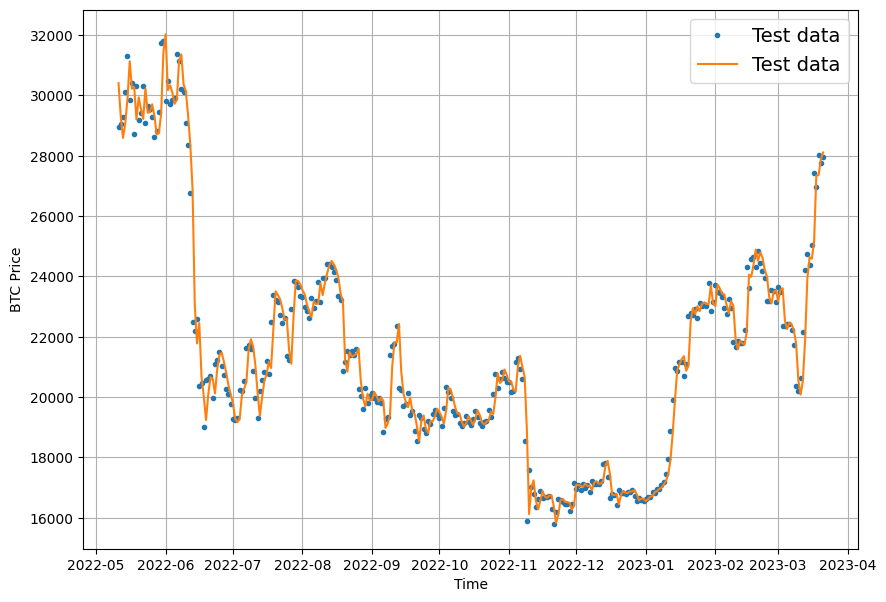

In [ ]:
#Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="Test data")

### Model 2: Dense(windows=30, horizon=1)

In [ ]:
WINDOW_SIZE = 30
HORIZON = 1

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(3078, 3078)

In [ ]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2486, 592, 2486, 592)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985, 423.204987, 411.574005, 404.424988,
         399.519989, 377.181   , 375.46701 , 386.944   , 383.61499 ,
         375.071991, 359.511993, 328.865997, 320.51001 , 330.07901 ,
         336.187012, 352.940002, 365.026001, 361.562012, 362.299011,
         378.549011, 390.414001, 400.869995, 394.77301 , 382.556   ],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987, 411.574005, 404.424988, 399.519989,
         377.181   , 375.46701 , 386.944   , 383.61499 , 375.071991,
         359.511993, 328.865997, 320.51001 , 330.07901 , 336.187012,
         352.940002, 365.026001, 361.562012, 362.299011, 378.549011,
         390.414001, 400.869995, 394.77301 , 382.556   , 383.757996],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005, 404.424988, 399.519989, 377.181   ,
         375.46701 , 386.944   ,

In [ ]:
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compile Model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,
                               test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)]
            )

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 7ms/step - loss: 893.6063 - mae: 893.6063 - mse: 1705628.6250


[893.6063232421875, 893.6063232421875, 1705628.625]

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

19/19 [==============================] - 1s 7ms/step - loss: 863.4291 - mae: 863.4291 - mse: 1664481.8750


[863.4290771484375, 863.4290771484375, 1664481.875]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

19/19 [==============================] - 0s 4ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)

In [ ]:
model_2_results

{'mae': 863.4291,
 'mse': 1664482.1,
 'rmse': 1290.1481,
 'mape': 2.5294478,
 'mase': 1.0832818}

In [ ]:
model_1_results

{'mae': 841.1715,
 'mse': 1574030.0,
 'rmse': 1254.6035,
 'mape': 2.4353049,
 'mase': 1.0398346}

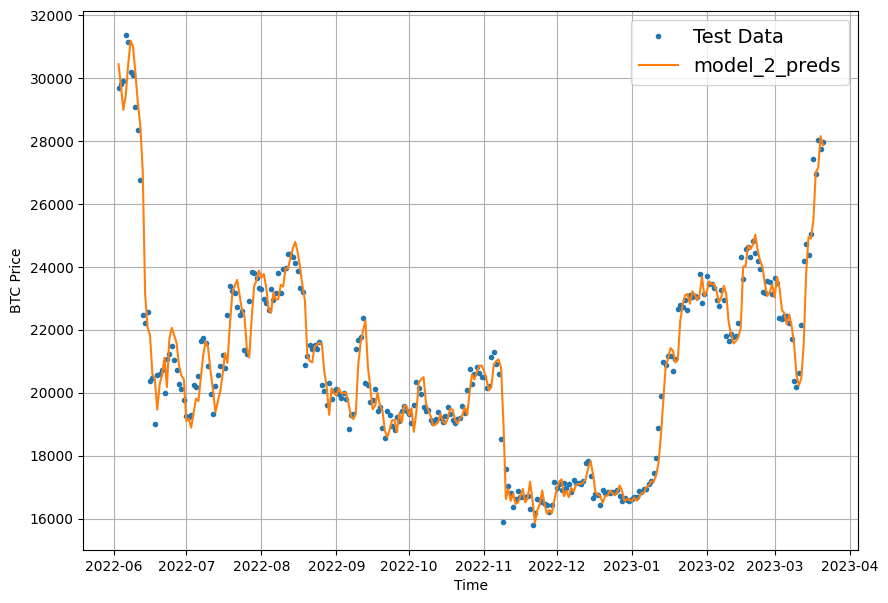

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="model_2_preds")

## Model 3: Dense (window = 30, horizon =7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3072, 3072)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2486, 586, 2486, 586)

In [ ]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compile the model

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,
                             test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
11/20 [===============>..............] - ETA: 0s - loss: 6908.0923 - mae: 6908.0923 - mse: 205519936.0000   

20/20 [==============================] - 3s 67ms/step - loss: 4819.0493 - mae: 4819.0493 - mse: 126815720.0000 - val_loss: 7626.1436 - val_mae: 7626.1436 - val_mse: 98987472.0000
Epoch 2/100
16/20 [=======================>......] - ETA: 0s - loss: 1493.2468 - mae: 1493.2468 - mse: 11858034.0000

20/20 [==============================] - 1s 54ms/step - loss: 1448.3488 - mae: 1448.3488 - mse: 11088226.0000 - val_loss: 3790.8584 - val_mae: 3790.8584 - val_mse: 27288006.0000
Epoch 3/100
12/20 [=================>............] - ETA: 0s - loss: 1174.6764 - mae: 1174.6764 - mse: 7356697.5000

20/20 [==============================] - 1s 49ms/step - loss: 1124.7284 - mae: 1124.7284 - mse: 6826490.5000 - val_loss: 3266.8003 - val_mae: 3266.8003 - val_mse: 19456154.0000
Epoch 4/100
18/20 [==========================>...] - ETA: 0s - loss: 1001.0270 - mae: 1001.0270 - mse: 5521830.5000

20/20 [==============================] - 1s 53ms/step - loss: 989.9500 - mae: 989.9500 - mse: 5366137.5000 - val_loss: 3162.9712 - val_mae: 3162.9712 - val_mse: 18604446.0000
Epoch 5/100
13/20 [==================>...........] - ETA: 0s - loss: 900.0491 - mae: 900.0491 - mse: 4394611.0000

20/20 [==============================] - 1s 53ms/step - loss: 911.1565 - mae: 911.1565 - mse: 4673673.0000 - val_loss: 2776.0151 - val_mae: 2776.0151 - val_mse: 14799344.0000
Epoch 6/100
12/20 [=================>............] - ETA: 0s - loss: 871.8477 - mae: 871.8477 - mse: 4458338.0000

20/20 [==============================] - 1s 50ms/step - loss: 849.5289 - mae: 849.5289 - mse: 4135579.7500 - val_loss: 2539.1704 - val_mae: 2539.1704 - val_mse: 12588633.0000
Epoch 7/100
 6/20 [========>.....................] - ETA: 0s - loss: 833.8306 - mae: 833.8306 - mse: 3850437.2500

20/20 [==============================] - 1s 47ms/step - loss: 809.1779 - mae: 809.1779 - mse: 3789578.5000 - val_loss: 2468.3589 - val_mae: 2468.3589 - val_mse: 12189936.0000
Epoch 8/100
16/20 [=======================>......] - ETA: 0s - loss: 770.8920 - mae: 770.8920 - mse: 3424243.0000

20/20 [==============================] - 2s 81ms/step - loss: 773.9919 - mae: 773.9919 - mse: 3481242.0000 - val_loss: 2436.6980 - val_mae: 2436.6980 - val_mse: 11939321.0000
Epoch 9/100
16/20 [=======================>......] - ETA: 0s - loss: 734.7845 - mae: 734.7845 - mse: 3185243.0000

20/20 [==============================] - 2s 86ms/step - loss: 750.7579 - mae: 750.7579 - mse: 3337887.7500 - val_loss: 2358.2502 - val_mae: 2358.2502 - val_mse: 11124319.0000
Epoch 10/100
18/20 [==========================>...] - ETA: 0s - loss: 737.9999 - mae: 737.9999 - mse: 3190392.7500

20/20 [==============================] - 1s 50ms/step - loss: 729.8877 - mae: 729.8877 - mse: 3151159.0000 - val_loss: 2168.8499 - val_mae: 2168.8499 - val_mse: 9535802.0000
Epoch 11/100
12/20 [=================>............] - ETA: 0s - loss: 712.2634 - mae: 712.2634 - mse: 2913799.7500

20/20 [==============================] - 1s 53ms/step - loss: 717.4102 - mae: 717.4102 - mse: 3028071.5000 - val_loss: 2089.0874 - val_mae: 2089.0874 - val_mse: 8978658.0000
Epoch 12/100
20/20 [==============================] - 0s 7ms/step - loss: 706.9077 - mae: 706.9077 - mse: 2931642.5000 - val_loss: 2124.8818 - val_mae: 2124.8818 - val_mse: 9108788.0000
Epoch 13/100
12/20 [=================>............] - ETA: 0s - loss: 664.0886 - mae: 664.0886 - mse: 2518377.7500

20/20 [==============================] - 1s 73ms/step - loss: 705.9776 - mae: 705.9776 - mse: 2875672.0000 - val_loss: 2007.0286 - val_mae: 2007.0286 - val_mse: 8384038.5000
Epoch 14/100
20/20 [==============================] - 0s 8ms/step - loss: 689.4438 - mae: 689.4438 - mse: 2773956.0000 - val_loss: 2374.4231 - val_mae: 2374.4231 - val_mse: 11012643.0000
Epoch 15/100
14/20 [====================>.........] - ETA: 0s - loss: 692.4277 - mae: 692.4277 - mse: 2851171.2500

20/20 [==============================] - 1s 46ms/step - loss: 693.7795 - mae: 693.7795 - mse: 2843435.7500 - val_loss: 1981.8405 - val_mae: 1981.8405 - val_mse: 8112261.5000
Epoch 16/100
20/20 [==============================] - 0s 8ms/step - loss: 679.8068 - mae: 679.8068 - mse: 2700882.7500 - val_loss: 2033.6241 - val_mae: 2033.6241 - val_mse: 8529064.0000
Epoch 17/100
20/20 [==============================] - 0s 15ms/step - loss: 676.1655 - mae: 676.1655 - mse: 2656795.7500 - val_loss: 2126.1511 - val_mae: 2126.1511 - val_mse: 8847033.0000
Epoch 18/100
20/20 [==============================] - 0s 8ms/step - loss: 661.9178 - mae: 661.9178 - mse: 2557736.0000 - val_loss: 2078.7778 - val_mae: 2078.7778 - val_mse: 9168034.0000
Epoch 19/100
20/20 [==============================] - 0s 6ms/step - loss: 662.9302 - mae: 662.9302 - mse: 2577475.2500 - val_loss: 2007.8989 - val_mae: 2007.8989 - val_mse: 8347583.5000
Epoch 20/100
13/20 [==================>...........] - ETA: 0s - loss: 642.8100 - 

20/20 [==============================] - 1s 55ms/step - loss: 654.0943 - mae: 654.0943 - mse: 2513190.2500 - val_loss: 1913.1173 - val_mae: 1913.1173 - val_mse: 7561572.5000
Epoch 21/100
20/20 [==============================] - 0s 9ms/step - loss: 679.5839 - mae: 679.5839 - mse: 2643945.5000 - val_loss: 1918.2622 - val_mae: 1918.2622 - val_mse: 7521344.5000
Epoch 22/100
20/20 [==============================] - 0s 8ms/step - loss: 660.7867 - mae: 660.7867 - mse: 2561777.5000 - val_loss: 2137.0693 - val_mae: 2137.0693 - val_mse: 9288262.0000
Epoch 23/100
20/20 [==============================] - 0s 9ms/step - loss: 656.6215 - mae: 656.6215 - mse: 2524072.7500 - val_loss: 2076.8040 - val_mae: 2076.8040 - val_mse: 8891349.0000
Epoch 24/100
20/20 [==============================] - 0s 8ms/step - loss: 672.2108 - mae: 672.2108 - mse: 2572711.7500 - val_loss: 1942.0548 - val_mae: 1942.0548 - val_mse: 7584419.5000
Epoch 25/100
20/20 [==============================] - 0s 9ms/step - loss: 655.0750

20/20 [==============================] - 1s 41ms/step - loss: 638.7493 - mae: 638.7493 - mse: 2367027.7500 - val_loss: 1849.6964 - val_mae: 1849.6964 - val_mse: 7151989.0000
Epoch 27/100
19/20 [===========================>..] - ETA: 0s - loss: 628.2520 - mae: 628.2520 - mse: 2341440.0000

20/20 [==============================] - 1s 47ms/step - loss: 627.3977 - mae: 627.3977 - mse: 2334753.2500 - val_loss: 1804.1704 - val_mae: 1804.1704 - val_mse: 6849486.0000
Epoch 28/100
20/20 [==============================] - 0s 14ms/step - loss: 644.1353 - mae: 644.1353 - mse: 2428947.7500 - val_loss: 1913.1954 - val_mae: 1913.1954 - val_mse: 7634797.0000
Epoch 29/100
14/20 [====================>.........] - ETA: 0s - loss: 601.0555 - mae: 601.0555 - mse: 2074462.0000

20/20 [==============================] - 1s 65ms/step - loss: 630.7818 - mae: 630.7818 - mse: 2344456.0000 - val_loss: 1798.3311 - val_mae: 1798.3311 - val_mse: 6889169.5000
Epoch 30/100
20/20 [==============================] - 0s 13ms/step - loss: 619.4372 - mae: 619.4372 - mse: 2266382.5000 - val_loss: 1905.7577 - val_mae: 1905.7577 - val_mse: 7687651.0000
Epoch 31/100
20/20 [==============================] - 0s 13ms/step - loss: 619.3668 - mae: 619.3668 - mse: 2266728.0000 - val_loss: 1880.2799 - val_mae: 1880.2799 - val_mse: 7486991.5000
Epoch 32/100
20/20 [==============================] - 0s 12ms/step - loss: 623.7476 - mae: 623.7476 - mse: 2288523.5000 - val_loss: 1883.0140 - val_mae: 1883.0140 - val_mse: 7164210.0000
Epoch 33/100
20/20 [==============================] - 0s 17ms/step - loss: 634.0472 - mae: 634.0472 - mse: 2313277.2500 - val_loss: 1842.9861 - val_mae: 1842.9861 - val_mse: 7005691.0000
Epoch 34/100
20/20 [==============================] - 0s 17ms/step - loss: 629

20/20 [==============================] - 1s 53ms/step - loss: 614.8023 - mae: 614.8023 - mse: 2204923.2500 - val_loss: 1764.9213 - val_mae: 1764.9213 - val_mse: 6590373.0000
Epoch 36/100
20/20 [==============================] - 0s 9ms/step - loss: 612.1993 - mae: 612.1993 - mse: 2235179.5000 - val_loss: 1800.6346 - val_mae: 1800.6346 - val_mse: 6931052.5000
Epoch 37/100
20/20 [==============================] - 0s 5ms/step - loss: 620.8674 - mae: 620.8674 - mse: 2260479.5000 - val_loss: 1924.0853 - val_mae: 1924.0853 - val_mse: 7600216.0000
Epoch 38/100
20/20 [==============================] - 0s 7ms/step - loss: 613.4498 - mae: 613.4498 - mse: 2228952.7500 - val_loss: 1933.2709 - val_mae: 1933.2709 - val_mse: 7679782.5000
Epoch 39/100
20/20 [==============================] - 0s 7ms/step - loss: 607.7570 - mae: 607.7570 - mse: 2175030.0000 - val_loss: 1879.9972 - val_mae: 1879.9972 - val_mse: 7470159.5000
Epoch 40/100
20/20 [==============================] - 0s 5ms/step - loss: 605.6559

20/20 [==============================] - 1s 36ms/step - loss: 615.7106 - mae: 615.7106 - mse: 2209378.0000 - val_loss: 1759.5342 - val_mae: 1759.5342 - val_mse: 6638993.5000
Epoch 47/100
20/20 [==============================] - 0s 11ms/step - loss: 597.1945 - mae: 597.1945 - mse: 2144285.5000 - val_loss: 1857.6626 - val_mae: 1857.6626 - val_mse: 7392287.5000
Epoch 48/100
18/20 [==========================>...] - ETA: 0s - loss: 586.2611 - mae: 586.2611 - mse: 2047900.0000

20/20 [==============================] - 1s 34ms/step - loss: 600.4568 - mae: 600.4568 - mse: 2103639.5000 - val_loss: 1744.3518 - val_mae: 1744.3518 - val_mse: 6447995.0000
Epoch 49/100
20/20 [==============================] - 0s 11ms/step - loss: 589.8058 - mae: 589.8058 - mse: 2061884.1250 - val_loss: 2134.0720 - val_mae: 2134.0720 - val_mse: 9086509.0000
Epoch 50/100
20/20 [==============================] - 0s 10ms/step - loss: 625.1901 - mae: 625.1901 - mse: 2247517.0000 - val_loss: 2036.5941 - val_mae: 2036.5941 - val_mse: 7683171.5000
Epoch 51/100
20/20 [==============================] - 0s 8ms/step - loss: 609.2572 - mae: 609.2572 - mse: 2143490.5000 - val_loss: 1992.9531 - val_mae: 1992.9531 - val_mse: 8104967.0000
Epoch 52/100
20/20 [==============================] - 0s 8ms/step - loss: 598.4753 - mae: 598.4753 - mse: 2099481.0000 - val_loss: 1879.5502 - val_mae: 1879.5502 - val_mse: 7332596.0000
Epoch 53/100
20/20 [==============================] - 0s 9ms/step - loss: 586.48

20/20 [==============================] - 1s 47ms/step - loss: 578.0958 - mae: 578.0958 - mse: 2006912.5000 - val_loss: 1712.9791 - val_mae: 1712.9791 - val_mse: 6202427.5000
Epoch 65/100
20/20 [==============================] - 0s 12ms/step - loss: 575.3914 - mae: 575.3914 - mse: 1969374.2500 - val_loss: 1741.3108 - val_mae: 1741.3108 - val_mse: 6348588.5000
Epoch 66/100
20/20 [==============================] - 0s 12ms/step - loss: 596.9502 - mae: 596.9502 - mse: 2091658.2500 - val_loss: 1976.6401 - val_mae: 1976.6401 - val_mse: 8071271.0000
Epoch 67/100
20/20 [==============================] - 0s 14ms/step - loss: 582.8414 - mae: 582.8414 - mse: 2053765.0000 - val_loss: 1768.2332 - val_mae: 1768.2332 - val_mse: 6659222.0000
Epoch 68/100
20/20 [==============================] - 0s 13ms/step - loss: 571.5544 - mae: 571.5544 - mse: 1963925.1250 - val_loss: 1719.4117 - val_mae: 1719.4117 - val_mse: 6293254.0000
Epoch 69/100
20/20 [==============================] - 0s 10ms/step - loss: 580

20/20 [==============================] - 2s 122ms/step - loss: 589.0954 - mae: 589.0954 - mse: 2024308.6250 - val_loss: 1709.9423 - val_mae: 1709.9423 - val_mse: 6253818.0000
Epoch 81/100
20/20 [==============================] - 0s 8ms/step - loss: 583.9071 - mae: 583.9071 - mse: 1976161.6250 - val_loss: 1785.4066 - val_mae: 1785.4066 - val_mse: 6666691.5000
Epoch 82/100
20/20 [==============================] - 0s 8ms/step - loss: 576.1678 - mae: 576.1678 - mse: 1960798.7500 - val_loss: 1769.7167 - val_mae: 1769.7167 - val_mse: 6740209.5000
Epoch 83/100
20/20 [==============================] - 0s 9ms/step - loss: 584.9805 - mae: 584.9805 - mse: 2033863.6250 - val_loss: 1811.2191 - val_mae: 1811.2191 - val_mse: 6908600.5000
Epoch 84/100
11/20 [===============>..............] - ETA: 0s - loss: 551.5149 - mae: 551.5149 - mse: 1754646.8750

20/20 [==============================] - 1s 48ms/step - loss: 561.4882 - mae: 561.4882 - mse: 1896873.5000 - val_loss: 1701.1212 - val_mae: 1701.1212 - val_mse: 6108251.5000
Epoch 85/100
20/20 [==============================] - 0s 10ms/step - loss: 575.4434 - mae: 575.4434 - mse: 1939438.1250 - val_loss: 1723.5527 - val_mae: 1723.5527 - val_mse: 6183577.5000
Epoch 86/100
20/20 [==============================] - 0s 8ms/step - loss: 575.8536 - mae: 575.8536 - mse: 1943752.6250 - val_loss: 1933.8645 - val_mae: 1933.8645 - val_mse: 7843241.5000
Epoch 87/100
20/20 [==============================] - 0s 13ms/step - loss: 585.6160 - mae: 585.6160 - mse: 2001275.7500 - val_loss: 1836.2263 - val_mae: 1836.2263 - val_mse: 6712418.0000
Epoch 88/100
20/20 [==============================] - 0s 8ms/step - loss: 573.3875 - mae: 573.3875 - mse: 1932104.2500 - val_loss: 1717.9016 - val_mae: 1717.9016 - val_mse: 6422722.0000
Epoch 89/100
20/20 [==============================] - 0s 10ms/step - loss: 580.2

In [ ]:
# Evaluate the model
model_3.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 5ms/step - loss: 2032.8964 - mae: 2032.8964 - mse: 8094429.0000


[2032.8963623046875, 2032.8963623046875, 8094429.0]

In [ ]:
# Load best version of model_3
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")

In [ ]:
model_3.evaluate(test_windows, test_labels)

19/19 [==============================] - 0s 4ms/step - loss: 1701.1212 - mae: 1701.1212 - mse: 6108252.5000


[1701.1212158203125, 1701.1212158203125, 6108252.5]

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

19/19 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[42640.605, 41786.2  , 41692.137, 41541.656, 41297.438, 41240.32 ,
        40966.957],
       [44630.543, 43949.047, 43401.22 , 43020.406, 42734.516, 43208.477,
        42437.207],
       [44705.484, 44452.555, 43762.26 , 43918.32 , 44342.617, 44140.34 ,
        43115.06 ],
       [46355.09 , 45124.9  , 45414.08 , 44799.496, 45518.48 , 45018.297,
        44233.86 ],
       [46236.56 , 46110.344, 45117.582, 45192.117, 45550.15 , 46040.004,
        45388.32 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([3850.612  , 2706.3113 , 2210.4275 , 1513.7439 , 1304.4113 ,
        1548.288  , 1899.3633 , 1253.0436 , 1715.5731 , 1611.3281 ,
        2308.4688 , 2399.9983 , 3438.6216 , 2943.4058 ,  802.245  ,
         694.9626 , 1363.668  , 1854.5519 , 1290.9894 , 1228.6803 ,
        1370.9297 ,  709.8337 , 1214.7812 , 1549.4208 , 2454.6206 ,
        2517.7114 , 2240.5747 , 2109.8684 , 2926.967  , 2894.2673 ,
        4590.743  , 6590.817  , 3489.423  , 1187.7338 , 1492.9509 ,
        1740.058  , 3295.769  , 2197.3035 , 2334.9475 , 2191.8733 ,
        2406.441  , 2708.1519 , 3066.9692 , 4211.723  , 4517.308  ,
        2303.476  , 1547.7216 , 1096.3342 , 1221.0234 , 1848.2422 ,
        2437.9058 , 3425.7043 , 3963.5212 , 6313.3154 , 8035.921  ,
        7770.562  , 5813.846  , 5643.8726 , 5695.165  , 5976.9756 ,
        4654.5967 , 2239.606  , 2222.0474 , 2821.7996 , 3012.0325 ,
        3510.1003 , 3436.754  , 4195.726  , 4978.39   , 5599.6147 ,
        3031.716  , 2444.8489 , 1838.5703

In [ ]:
# Tweak our evaluate_preds function to work with multiple tensor shapes
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

# Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae =  tf.reduce_mean(mae)
    mse =  tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return{"mae": mae.numpy(),
         "mse": mse.numpy(),
         "rmse": rmse.numpy(),
         "mape": mape.numpy(),
         "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1701.1212,
 'mse': 6108251.5,
 'rmse': 1949.5363,
 'mape': 5.059706,
 'mase': 2.1384375}

In [ ]:
naive_results

{'mae': 807.2651,
 'mse': 1472733.9,
 'rmse': 1213.5625,
 'mape': 2.3311524,
 'mase': 1.0002266}

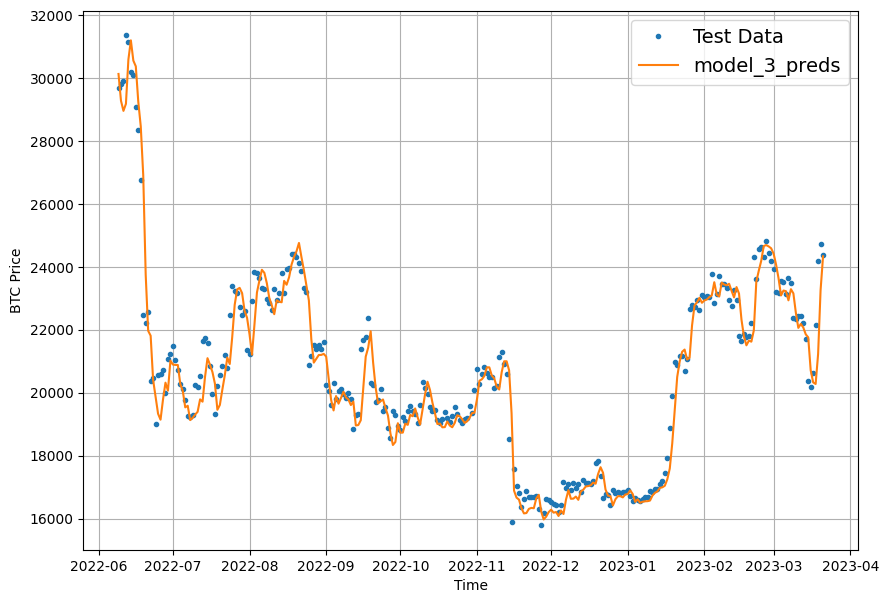

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format=".",
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

<Axes: >

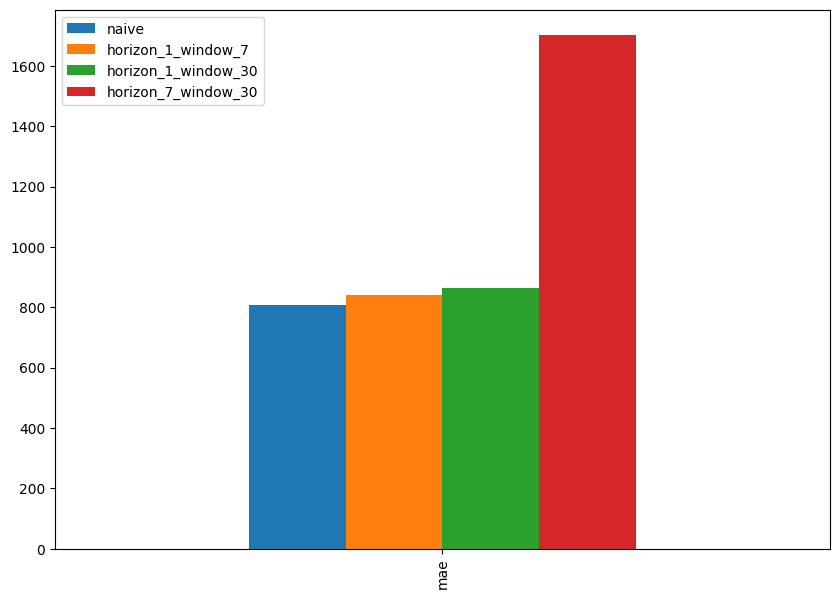

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

### Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3101, 3101)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2486, 2486, 615, 615)

We need an input shape of: (batch_size, timesteps, input_dim)...
However our data isn't in that shape yet...

In [ ]:
# Check data input shape
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# Test out lambda layer
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [ ]:
x.numpy(), expand_dims_layer(x).numpy()

(array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985]),
 array([[457.334],
        [424.44 ],
        [394.796],
        [408.904],
        [398.821],
        [402.152],
        [435.791]], dtype=float32))

In [ ]:
tf.random.set_seed(42)

 # Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer="Adam",
                metrics=["mae"])
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,
                             test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_140 (Dense)           (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows,test_labels)

20/20 [==============================] - 0s 5ms/step - loss: 880.2545 - mae: 880.2545


[880.2544555664062, 880.2544555664062]

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 6ms/step - loss: 845.5700 - mae: 845.5700


[845.5700073242188, 845.5700073242188]

In [ ]:
model_4_preds = make_preds(model_4, test_windows)

20/20 [==============================] - 0s 3ms/step


In [ ]:
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([32827.418, 31940.15 , 31438.568, 31401.541, 31653.152, 31024.27 ,
       29972.658, 31535.436, 32298.545, 33395.863], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_label, axis=1),
                                 y_pred=model_4_preds)

In [ ]:
model_4_results

{'mae': 33543.145,
 'mse': 1318533400.0,
 'rmse': 36311.613,
 'mape': 479187.75,
 'mase': nan}

In [ ]:
model_3_results

{'mae': 1701.1212,
 'mse': 6108251.5,
 'rmse': 1949.5363,
 'mape': 5.059706,
 'mase': 2.1384375}

## Model 5: RNN(LSTM)

In [ ]:
tf.random.set_seed(42)

# Create LSTM model
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

# Compile the LSTM model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,
                             test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
20/20 [==============================] - 6s 187ms/step - loss: 6982.0210 - val_loss: 21733.4395
Epoch 2/100
20/20 [==============================] - 2s 121ms/step - loss: 3787.7788 - val_loss: 7417.7251
Epoch 3/100
20/20 [==============================] - 2s 124ms/step - loss: 834.1211 - val_loss: 2127.3181
Epoch 4/100
20/20 [==============================] - 2s 91ms/step - loss: 479.4605 - val_loss: 1625.5643
Epoch 5/100
20/20 [==============================] - 2s 91ms/step - loss: 453.7401 - val_loss: 1418.9530
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 418.1367 - val_loss: 1654.9694
Epoch 7/100
20/20 [==============================] - 2s 112ms/step - loss: 491.3675 - val_loss: 1413.3606
Epoch 8/100
20/20 [==============================] - 0s 18ms/step - loss: 450.3671 - val_loss: 1539.6914
Epoch 9/100
20/20 [==============================] - 0s 17ms/step - loss: 437.9440 - val_loss: 1496.3218
Epoch 10/100
20/20 [=============================

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows,
                 test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 892.3983


892.3982543945312

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

20/20 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([32888.63 , 32155.56 , 31476.645, 31462.598, 31662.314],
      dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 892.39825,
 'mse': 1734007.0,
 'rmse': 1316.817,
 'mape': 2.5921297,
 'mase': 1.1031598}

In [ ]:
naive_results

{'mae': 807.2651,
 'mse': 1472733.9,
 'rmse': 1213.5625,
 'mape': 2.3311524,
 'mase': 1.0002266}

In [ ]:
model_1_results

{'mae': 841.1715,
 'mse': 1574030.0,
 'rmse': 1254.6035,
 'mape': 2.4353049,
 'mase': 1.0398346}

## Model 6: Multivariate data

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.tail()


,Price
Date,
2023-03-17,27423.929688
2023-03-18,26965.878906
2023-03-19,28038.675781
2023-03-20,27767.236328
2023-03-21,27961.429688


We'll try with separate data, first, we'll use the bitcoin halving dates: https://www.cmcmarkets.com/en-nz/learn-cryptocurrencies/bitcoin-halving

Secondly, we'll use the Miseian Stationarity Index which predicts the cycles of booms and bust on the economy, by analysing the level of distortion caused by central banks: https://msindex.net/

Thirdly, we'll try to add the LIBOR historical rates, if possible, because they are a reliable source of prediction of a possible economy bust that is about to happen.

The first dataset we'll add is a good benchmark for possible increases in prices of bitcoin as it is correlated with previous increases. The second is added because there is a correlation between distortion caused by money printing and interest rate control to people's will to protect itself from central banks economic interventions via bitcoin. And the third one is due to the correlation between economic and financial crisis and a followup of bitcoin boom.

## Adding block reward

In [ ]:
block_reward_1 = 50  # 3 Jan 2009
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_2_days

661

In [ ]:
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [ ]:
block_reward_3_days

2070

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.iloc[:block_reward_2_days:, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

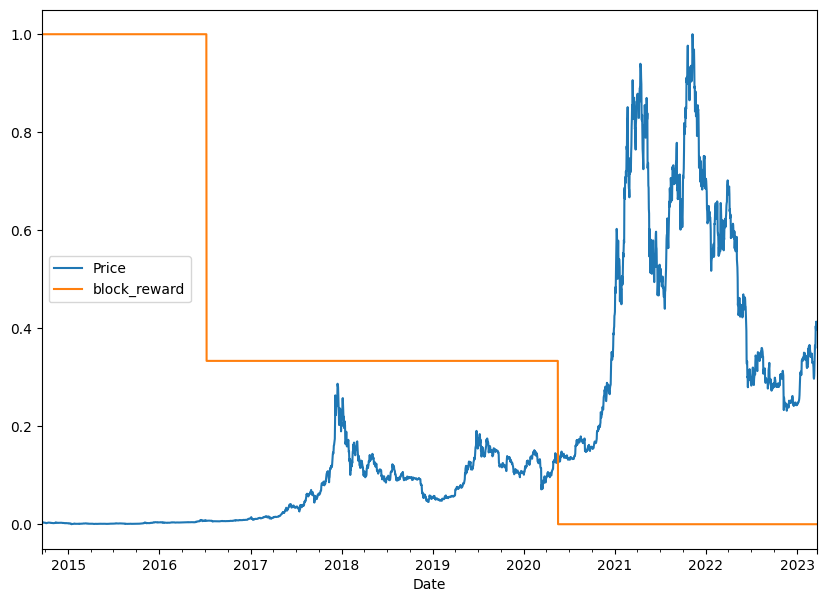

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                        columns=bitcoin_prices_block.columns,
                                                                        index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7));             

## Make windowed dataset with pandas

In [ ]:
# Setup data hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): 
  bitcoin_prices_windowed[f"Price:+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price:+1,Price:+2,Price:+3,Price:+4,Price:+5,Price:+6,Price:+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price:+1,Price:+2,Price:+3,Price:+4,Price:+5,Price:+6,Price:+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
# Make train and test stes using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2480, 2480, 621, 621)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
# Fit the model
model_6.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            validation_data=(X_test,
                             y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)],
            verbose=0)

In [ ]:
model_6.evaluate(X_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 827.1099


827.1099243164062

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

20/20 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([32854.668, 33572.883, 33497.785, 34068.53 , 33379.316, 32793.234,
       32689.215, 31779.867, 31340.994, 31425.904], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)

In [ ]:
model_6_results

{'mae': 827.1099,
 'mse': 1547035.2,
 'rmse': 1243.7987,
 'mape': 2.387924,
 'mase': 1.0248151}

In [ ]:
model_1_results

{'mae': 841.1715,
 'mse': 1574030.0,
 'rmse': 1254.6035,
 'mape': 2.4353049,
 'mase': 1.0398346}

### Model X: Hybrid with Miseian stationarity index

# Experiment trying to add the MS Index 

This code uses the resample function from Pandas to convert the monthly data to daily data by forward-filling missing values. It then converts the daily data to a NumPy array and uses interp1d to perform linear interpolation. Finally, it creates a new Pandas DataFrame with the interpolated daily data.
Note that we need to convert the dates in the daily data to Unix timestamps (seconds since January 1, 1970) before passing them to interp1d. We can then convert them back to datetime objects using Pandas after interpolating the values.

In [ ]:
!wget https://raw.githubusercontent.com/ClaudioAresu/BitPrice_Project/main/msi_ten_years.json

--2023-04-04 11:20:58--  https://raw.githubusercontent.com/ClaudioAresu/BitPrice_Project/main/msi_ten_years.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4426 (4.3K) [text/plain]
Saving to: ‘msi_ten_years.json.1’

msi_ten_years.json. 100%[===================>]   4.32K  --.-KB/s    in 0s      

2023-04-04 11:20:58 (55.1 MB/s) - ‘msi_ten_years.json.1’ saved [4426/4426]



In [ ]:
pd_msi = pd.read_json("/content/msi_ten_years.json")

pd_msi.head()

,date,equity,netWorth,index
0,2013-01-01,16522.480,14925.927,1.503047
1,2013-04-01,18558.962,15291.283,1.645197
2,2013-07-01,18864.337,15540.637,1.642688
3,2013-10-01,19960.482,16507.867,1.633606
4,2014-01-01,21515.318,17103.125,1.696569


In [ ]:
pd_msi.tail()

,date,equity,netWorth,index
39,2022-10-01,37765.084,29397.222,1.628029
40,2023-01-01,39674.629,30894.733,1.625088
41,2023-02-01,40796.800,30894.733,1.668509
42,2023-03-01,39621.600,30894.733,1.618133
43,2023-03-30,40508.300,30894.733,1.651891


In [ ]:
len(pd_msi)

44

In [ ]:
pd_msi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      44 non-null     datetime64[ns]
 1   equity    44 non-null     float64       
 2   netWorth  44 non-null     float64       
 3   index     44 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 KB


In [ ]:
pd_msi["date"].tail()

39   2022-10-01
40   2023-01-01
41   2023-02-01
42   2023-03-01
43   2023-03-30
Name: date, dtype: datetime64[ns]

In [ ]:
pd_msi.set_index("date", inplace=True)
pd_msi.drop(columns=["equity", "netWorth"], inplace=True)
pd_msi.head()

,index
date,
2013-01-01,1.503047
2013-04-01,1.645197
2013-07-01,1.642688
2013-10-01,1.633606
2014-01-01,1.696569


In [ ]:
pd_msi.head()

,index
date,
2013-01-01,1.503047
2013-04-01,1.645197
2013-07-01,1.642688
2013-10-01,1.633606
2014-01-01,1.696569


In [ ]:
len(pd_msi[:"2023-03-01"])

43

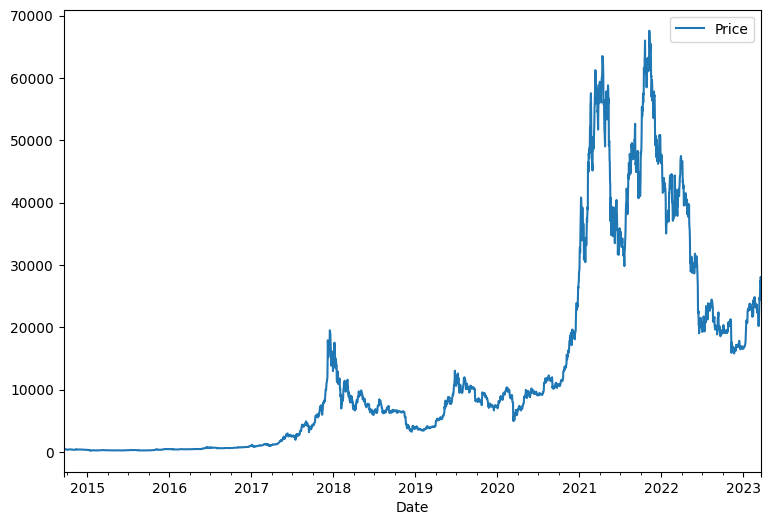

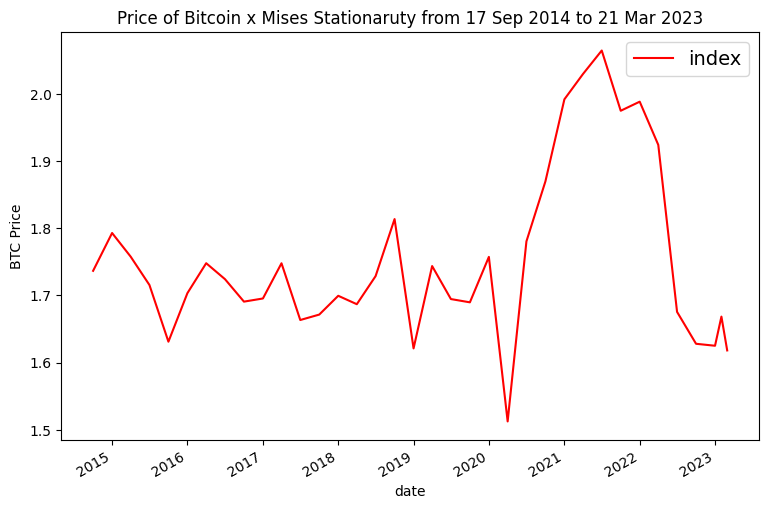

In [ ]:
bitcoin_prices.plot(figsize=(9,6))
pd_msi.iloc[7:43].plot(figsize=(9,6), c="r")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin x Mises Stationaruty from 17 Sep 2014 to 21 Mar 2023")
plt.legend(fontsize=14)

In [ ]:
# from google.colab import files
# files.download("/content/tenYear.json")

In [ ]:
# # interpolating the montly data in a linear fashion
# import numpy as np
# from scipy.interpolate import interp1d

# # Suppose you have a Pandas DataFrame with monthly data
# df_monthly = pd.DataFrame({
#     'date': pd.date_range(start='2022-01-01', end='2022-04-01', freq='M'),
#     'value': [10, 20, 30, 40]
# })

# # Convert the monthly data to daily data using Pandas
# df_daily = df_monthly.set_index('date').resample('D').ffill().reset_index()

# # Convert the daily data to a NumPy array
# dates = df_daily['date'].values.astype(np.int64) // 10**9
# values = df_daily['value'].values
# daily_data = np.column_stack((dates, values))

# # Create a SciPy interpolation function
# interpolation_fn = interp1d(daily_data[:, 0], daily_data[:, 1], kind='linear')

# # Define the start and end dates of the daily data
# start_date = daily_data[0, 0]
# end_date = daily_data[-1, 0]

# # Create a list of daily dates
# dates = list(range(start_date, end_date + 1))

# # Interpolate the monthly data to daily data
# interpolated_values = interpolation_fn(dates)

# # Create a new DataFrame with the interpolated daily data
# df_interpolated = pd.DataFrame({
#     'date': pd.to_datetime(dates, unit='s'),
#     'value': interpolated_values
# })

### Model 7: NBEATS

In [ ]:
# Create NbeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers, each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test ou NBeatsBlock class

To do we'll make some dymmy inputs and outputs.

In [ ]:
# Set up dummy NBeatsBlock layer
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, #backcast and forecast
                                       horizon=HORIZON,
                                       n_layers=4,
                                       n_neurons=128)

# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBEatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.65579414  0.03643142 -0.5157504  -0.37814164 -0.45949358 -0.95541966
 -0.37486207]
Forecast: -0.8597592711448669


### Preparing data for the N-BEATS algorithm using `tf.data`

to make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the `tf.data` guide:

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

In [ ]:
# Make train and test setes
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2480, 2480, 621, 621)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm
the N-BEATS algorithm has a fair few number of parameters, as shows on Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)

### Getting the residual connections

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])
# Get Output
print(f"Input tensor: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Adeded: {added.numpy()}")

Input tensor: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Adeded: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock`
( this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API
3. Make the initial backcast and forecasts for the method with the layer created in (1)
4. Use the for loop to create astacks of block layers
5. use the `NBeatsBlock` class within the for loop in (4
 to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it in line with our other models) and Adam optimizer with default setting as per section 5.2 if N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use  a couple of callbacks:
  * EarlyStopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 horizon=HORIZON,
                                 theta_size=THETA_SIZE,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create the initial backcast and forecast
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                 horizon=HORIZON,
                                 theta_size=THETA_SIZE,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name=f"NBeatsBlock_{i}"    
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#9. Fit the model
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=200,
                                                       restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 1258: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1358: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 4min 49s, sys: 6.44 s, total: 4min 55s
Wall time: 5min 43s


In [ ]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 829.9807


829.9806518554688

In [ ]:
model_7_preds= make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33017.027, 33685.977, 33507.535, 34105.363, 33465.74 , 32747.89 ,
       32854.758, 31902.402, 31511.703, 31472.99 ], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)

In [ ]:
model_1_results, model_7_results, naive_results, model_6_results

({'mae': 841.1715,
  'mse': 1574030.0,
  'rmse': 1254.6035,
  'mape': 2.4353049,
  'mase': 1.0398346},
 {'mae': 829.98065,
  'mse': 1547623.6,
  'rmse': 1244.0352,
  'mape': 2.3979127,
  'mase': 1.0283719},
 {'mae': 807.2651,
  'mse': 1472733.9,
  'rmse': 1213.5625,
  'mape': 2.3311524,
  'mase': 1.0002266},
 {'mae': 827.1099,
  'mse': 1547035.2,
  'rmse': 1243.7987,
  'mape': 2.387924,
  'mase': 1.0248151})

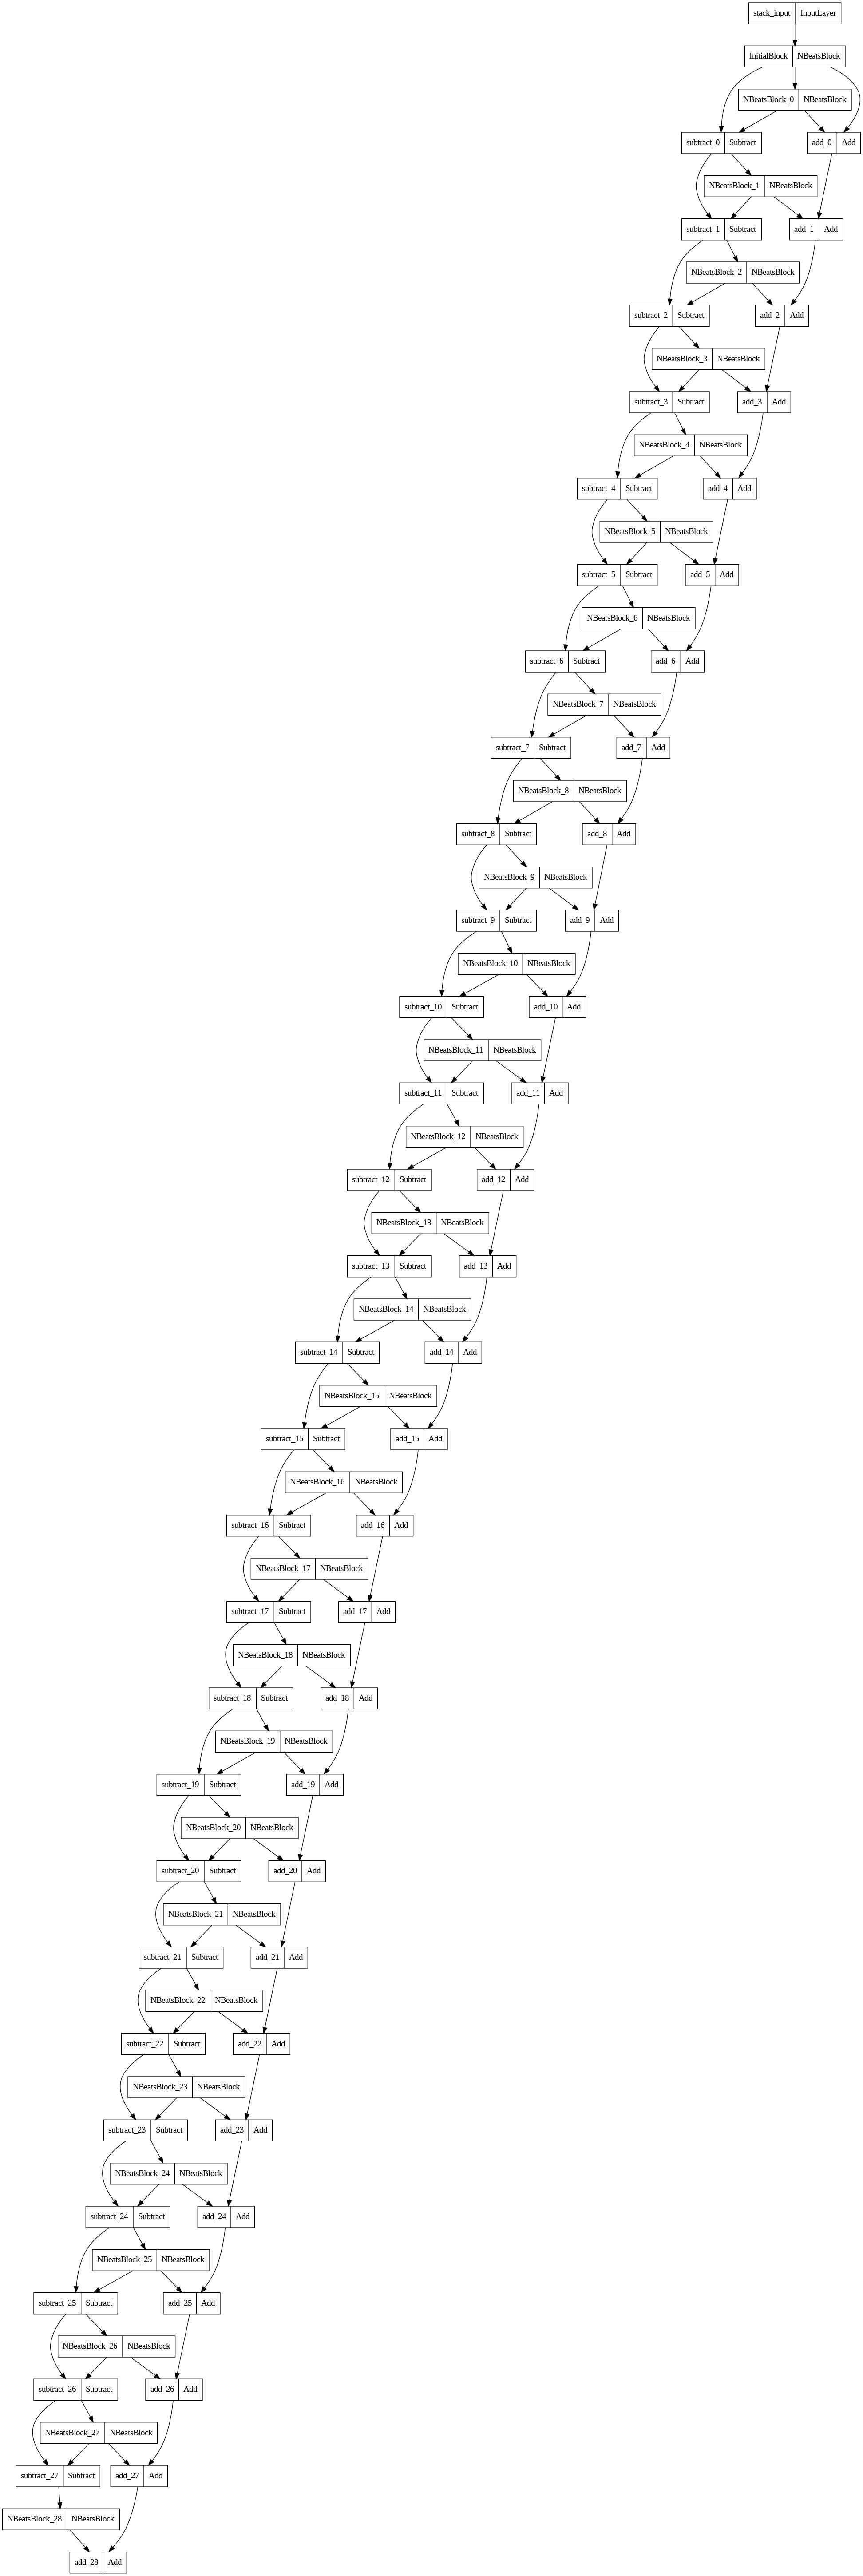

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

### Model 8: Creating an ensemble

In [ ]:
WINDOW_SIZE, HORIZON

(7, 1)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fun=["mae", "mse", "mape"]):
  """
  Returns a list a  num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make an empty list for trained ensemble models
  ensemble_models=[]

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fun:
      print(f"Optimizing model by reducing: {loss_function} for{num_epochs} epochs, model number; {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer='he_normal', activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)
  
  return ensemble_models
                           

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models = get_ensemble_models(num_iter=5,
                                                            num_epochs=1000)

In [ ]:
ensemble_models

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 56ms/step
CPU times: user 866 ms, sys: 27.6 ms, total: 894 ms
Wall time: 977 ms


<tf.Tensor: shape=(15, 621), dtype=float32, numpy=
array([[33099.914, 33977.234, 33686.492, ..., 27419.953, 28234.334,
        27997.584],
       [32643.61 , 34087.03 , 33310.207, ..., 27111.875, 28800.48 ,
        27899.664],
       [32824.906, 33672.02 , 33380.74 , ..., 27001.396, 27979.107,
        27686.977],
       ...,
       [32590.469, 33435.84 , 33341.3  , ..., 27000.992, 27813.73 ,
        27859.688],
       [33028.49 , 33836.7  , 33586.13 , ..., 27082.264, 28278.107,
        27796.855],
       [32945.273, 33724.844, 33439.7  , ..., 27346.902, 28326.178,
        27935.447]], dtype=float32)>

In [ ]:
y_test

Date
2021-07-09    33798.011719
2021-07-10    33520.519531
2021-07-11    34240.187500
2021-07-12    33155.847656
2021-07-13    32702.025391
                  ...     
2023-03-17    27423.929688
2023-03-18    26965.878906
2023-03-19    28038.675781
2023-03-20    27767.236328
2023-03-21    27961.429688
Name: Price, Length: 621, dtype: float64

In [ ]:
# Evalaute ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 834.094,
 'mse': 1548097.9,
 'rmse': 1243.9794,
 'mape': 2.4090567,
 'mase': 1.0334685}

In [ ]:
model_1_results

{'mae': 841.1715,
 'mse': 1574030.0,
 'rmse': 1254.6035,
 'mape': 2.4353049,
 'mase': 1.0398346}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

In [ ]:
ensemble_results_mean = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results_mean

{'mae': 815.1409,
 'mse': 1502870.0,
 'rmse': 1225.916,
 'mape': 2.3502092,
 'mase': 1.0099851}

In [ ]:
ensemble_results_median = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results_median

{'mae': 814.1219,
 'mse': 1497268.8,
 'rmse': 1223.6293,
 'mape': 2.3493016,
 'mase': 1.0087224}

### Plotting the prediction intervals(uncertainty estimates) of our ensemble

so far we've ben making point predictions with our models.

E.g. horizon =1, our model predicts tomorrow's price of Bitcoin will be $50, 000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50.000 USD on the dot, how about 48.000 to 52.000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Laplace-Gauss/Normal, 95% of observations fall within 1.96 stanrad deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the prediction made in (1)

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):
  # 1. take the predictions form  a number of randomly initialized models

  # 2. Measure the standrad deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper
  

In [ ]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)


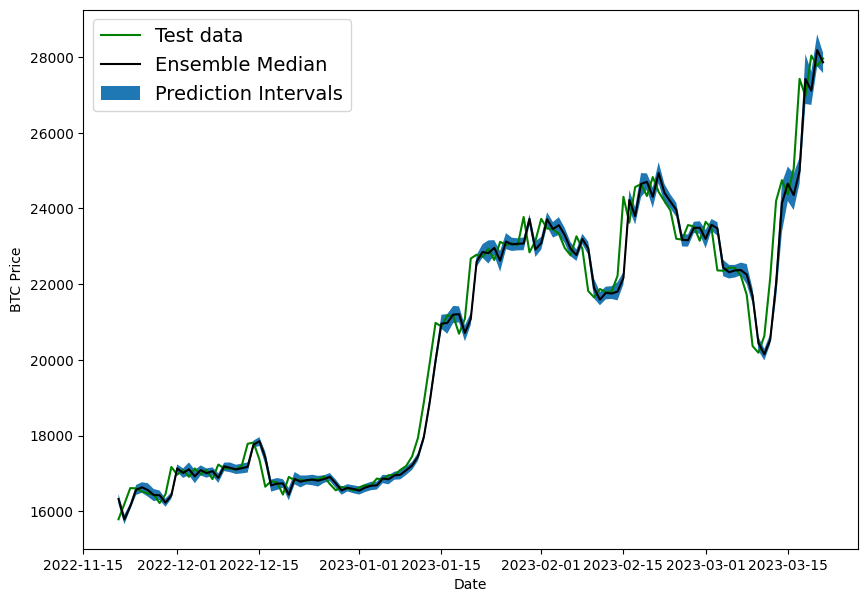

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively awnser the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? ( what can a model never predict? Or would  it be helpful if a model could tell you that when it's making a prediction, it doesn't actually know if  it's right or not?)

There are two major types of uncertainty in amchine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced and is often referred as "coconut" uncertainty

 Evidential deep learning and uncertainty
 https://www.youtube.com/watch?v=toTcf7tZK8c

 ## Model 9: Train a model on the full historical data to make predictions into the future

 So dar all of our models have predicted on the test dataset, however, this is only a pseudofuture.

 Let's now build a model which is capable of predicting into the future!

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.tail()

In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

In [ ]:
X_all[:5], y_all[:5]

In [ ]:
# Turns data into efficient runninf tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], )

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into the future

In [ ]:
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
* A list of values(Bitcoin Historical Data)
* A trained model (such as `model_9`)
* A window into the future to predict (our `INTO_FUTURE` variable)
* The window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
y_all[-WINDOW_SIZE:]

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends
  
  Returns future forecasts as a list of floats
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range (INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Prediction on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get 
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

In [ ]:
bitcoin_prices_windowed.tail()

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtyp="datetime64[D]") # return a date range betweend start and end date

In [ ]:
# Last timestep of timesteps (currenty np.datetime64 format)
last_timestep = bitcoin_price.index[-1]
last_timestep

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

In [ ]:
# Inset last timestep/final price into next time steps and future forecasts so the plot
next_time_steps = np.inset(next_time_steps, 0, last_timestep)
future_forecast = np.inset(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(fifsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label=" Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [ ]:
# Let's introduce our turkey problem to our BTC data (price of BTC falls 1090x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
len(btc_price_turkey)

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

In [ ]:
btc_price[-10:]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500)

In [ ]:
# Create train and test datasets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
model_1.summary()

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name= "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(model_name=turkey_model.name)])

In [ ]:
turkey_model.evaluate(X_test, y_test)

In [ ]:
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds", start=offset); 

In [ ]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": tyrkey_results,
                              }).T
model_results.head(10)

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by=mae).plot(figsize=(10,7), kind="bar")